# Study Case

The objective of the assignment is to use the following data set to **provide advice to a client of your choosing**. The data set is Crash Stats - Data Extract - Datasets - Victorian Government Data Directory. This is public data was collected on the web and is not related to any work we currently undertake.

**We would like you to investigate, analyse it and prepare a presentation.** You may also supplement the analysis with additional data as you see fit, but the core analysis should be focused on the crashes.

# Age Clustering

In this part, the objective is to find some clusters within accidents. An idea to explore is to see if there are possible clusters in an accident hour versus age graph.

## Creation of the dataset

In [1]:
# Standar imports

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
# Dataset imports

df_ACCIDENT = pd.read_csv('data/ACCIDENT/ACCIDENT.csv')
df_ACCIDENT = df_ACCIDENT[["ACCIDENT_NO", "ACCIDENTTIME"]]

df_PERSON = pd.read_csv('data/ACCIDENT/PERSON.csv')
df_cluster = df_PERSON[["ACCIDENT_NO", "AGE"]]
df_cluster.info()

/var/folders/wd/b2zxwxkj4bnbz090jqqzh0sm0000gn/T/ipykernel_44678/611322082.py:3: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ACCIDENT = pd.read_csv('data/ACCIDENT/ACCIDENT.csv')
/var/folders/wd/b2zxwxkj4bnbz090jqqzh0sm0000gn/T/ipykernel_44678/611322082.py:6: DtypeWarning: Columns (6,9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_PERSON = pd.read_csv('data/ACCIDENT/PERSON.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490948 entries, 0 to 490947
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ACCIDENT_NO  490948 non-null  object 
 1   AGE          469319 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.5+ MB


In [3]:
df_cluster = df_cluster.merge(df_ACCIDENT, on="ACCIDENT_NO")
df_cluster.head()

,ACCIDENT_NO,AGE,ACCIDENTTIME
0,T20060000010,NaN,12:42:00
1,T20060000010,43.0,12:42:00
2,T20060000010,22.0,12:42:00
3,T20060000010,72.0,12:42:00
4,T20060000010,62.0,12:42:00


In [4]:
# Remove null rows
df_cluster = df_cluster[df_cluster.AGE.notna()]
df_cluster.head()

,ACCIDENT_NO,AGE,ACCIDENTTIME
1,T20060000010,43.0,12:42:00
2,T20060000010,22.0,12:42:00
3,T20060000010,72.0,12:42:00
4,T20060000010,62.0,12:42:00
5,T20060000010,39.0,12:42:00


In [5]:
df_cluster.shape

(469319, 3)

In [6]:
df_X = df_cluster.iloc[:20_000, 1:3]
df_X.head()

,AGE,ACCIDENTTIME
1,43.0,12:42:00
2,22.0,12:42:00
3,72.0,12:42:00
4,62.0,12:42:00
5,39.0,12:42:00


In [7]:
df_X["ACCIDENTTIME"] = pd.to_datetime(df_X["ACCIDENTTIME"])

In [8]:
df_X.ACCIDENTTIME.info()

<class 'pandas.core.series.Series'>
Int64Index: 20000 entries, 1 to 21351
Series name: ACCIDENTTIME
Non-Null Count  Dtype         
--------------  -----         
20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 312.5 KB


In [9]:
# Get the hours
df_X["HOURS"] = df_X["ACCIDENTTIME"].dt.hour
df_X.head()

,AGE,ACCIDENTTIME,HOURS
1,43.0,2022-11-20 12:42:00,12
2,22.0,2022-11-20 12:42:00,12
3,72.0,2022-11-20 12:42:00,12
4,62.0,2022-11-20 12:42:00,12
5,39.0,2022-11-20 12:42:00,12


In [10]:
X_clustering = df_X.drop("ACCIDENTTIME", axis=1)
X_clustering.head()

,AGE,HOURS
1,43.0,12
2,22.0,12
3,72.0,12
4,62.0,12
5,39.0,12


## K-Means algorithm

In [11]:
from sklearn.cluster import KMeans

To find the right number of clusters, Elbow's method is used. For this case, this method calculates the inertia of a number of clusters between 2 and 10. The rule is to choose the number of clusters where you see kinks or "bends" in the graph.

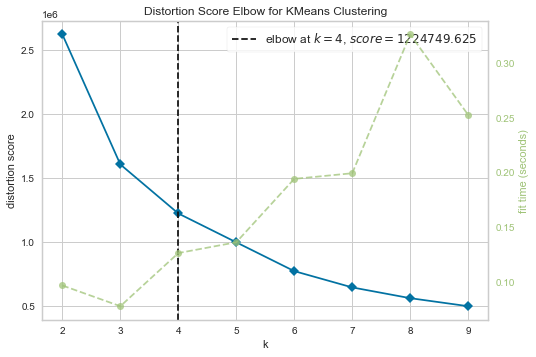

In [12]:
from yellowbrick.cluster import KElbowVisualizer

KMean_model = KMeans(random_state=1)
viz = KElbowVisualizer(KMean_model, k=(2,10))
viz.fit(X_clustering)
viz.show()
plt.show()

There is no clear elbow visible. The visualizer suggests 4 clusters. We try another way to choose the best number of clusters thanks to the silhouette score. Choosing between 3 or 4 clusters might be a great idea.

The silhouette coefficient is a measure of the quality of a partition of a dataset in automatic classification. For each point, its silhouette coefficient is the difference between the average distance to points in the same group as it (cohesion) and the average distance to points in other neighbouring groups (separation).

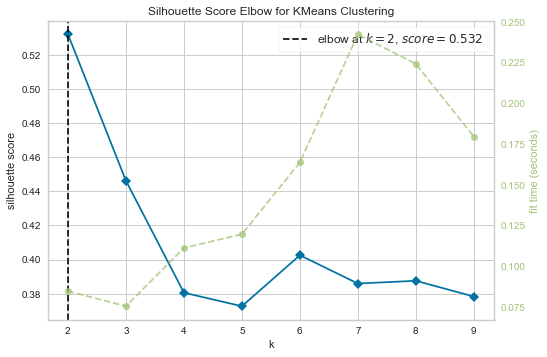

In [13]:
KMean_model = KMeans(random_state=1)
viz = KElbowVisualizer(KMean_model, k=(2,10), metric='silhouette')
viz.fit(X_clustering)
viz.show()
plt.show()

Let's choose 3 clusters.

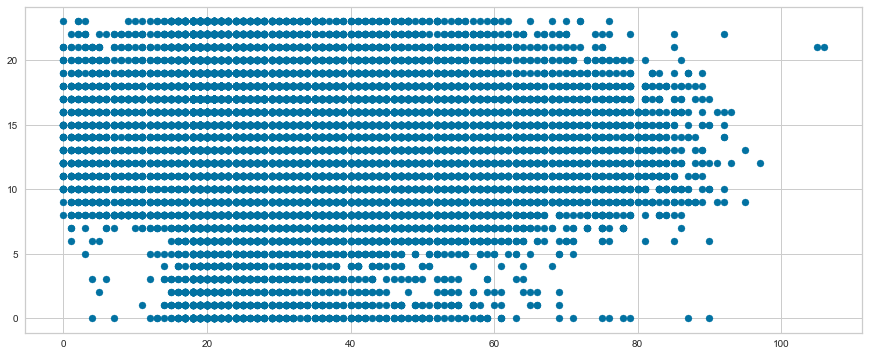

In [18]:
plt.figure(figsize=(15,6))
plt.scatter(X_clustering.iloc[:,0], X_clustering.iloc[:,1])
plt.show()

In [20]:
KM_3_clusters = KMeans(n_clusters=3, init='k-means++')
KM_3_clusters.fit(X_clustering)

# We append the labels to points
KM_3_clustered = X_clustering.copy()
KM_3_clustered.loc[:, 'Clusters'] = KM_3_clusters.labels_

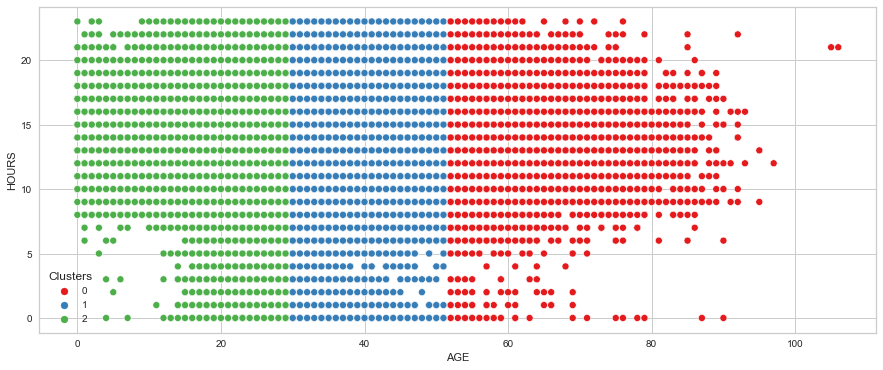

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=KM_3_clustered, x="AGE", y="HOURS", hue="Clusters", palette='Set1')
plt.show()

Not a very relevant study...

# Linear Regression

The goal is to point out the overall trend of the accident number and predicting this number for the next years.

In [7]:
df_LR = pd.read_csv('data/LR_dataset.csv')
df_LR.head()

,ACCIDENT_NO,ACCIDENT_YEAR,ACCIDENT_TYPE,Accident Type Desc,DCA_CODE,DCA Description,ROAD_GEOMETRY,Road Geometry Desc
0,T20060000010,2006,1,Collision with vehicle,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Cross intersection
1,T20060000018,2006,1,Collision with vehicle,113,RIGHT NEAR (INTERSECTIONS ONLY),2,T intersection
2,T20060000022,2006,7,Fall from or in moving vehicle,190,FELL IN/FROM VEHICLE,5,Not at intersection
3,T20060000023,2006,1,Collision with vehicle,130,REAR END(VEHICLES IN SAME LANE),2,T intersection
4,T20060000026,2006,1,Collision with vehicle,121,RIGHT THROUGH,5,Not at intersection


We remove the data from 2020 as COVID-19 played an important that doesn't reflect the real truth. 

In [9]:
# Remove 2020 data

df_LR = df_LR[df_LR["ACCIDENT_YEAR"] != 2020]
df_LR.shape

(183171, 8)

## General trend

In [10]:
df_LR.groupby("ACCIDENT_YEAR").count()

,ACCIDENT_NO,ACCIDENT_TYPE,Accident Type Desc,DCA_CODE,DCA Description,ROAD_GEOMETRY,Road Geometry Desc
ACCIDENT_YEAR,,,,,,,
2006,13141,13141,13141,13141,13141,13141,13141
2007,13253,13253,13253,13253,13253,13253,13253
2008,13535,13535,13535,13535,13535,13535,13535
2009,13172,13172,13172,13172,13172,13172,13172
2010,12935,12935,12935,12935,12935,12935,12935
2011,12912,12912,12912,12912,12912,12912,12912
2012,13025,13025,13025,13025,13025,13025,13025
2013,13070,13070,13070,13070,13070,13070,13070
2014,13366,13366,13366,13366,13366,13366,13366


In [57]:
df_general_trend = df_LR.groupby("ACCIDENT_YEAR").count()["ACCIDENT_NO"].reset_index()
df_general_trend

,ACCIDENT_YEAR,ACCIDENT_NO
0,2006,13141
1,2007,13253
2,2008,13535
3,2009,13172
4,2010,12935
5,2011,12912
6,2012,13025
7,2013,13070
8,2014,13366
9,2015,14306


In [52]:
X_test = np.arange(2006, 2024)
X_test

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [41]:
# Creation of our model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

We will use the validation curve to see which degree fits the most our curve.

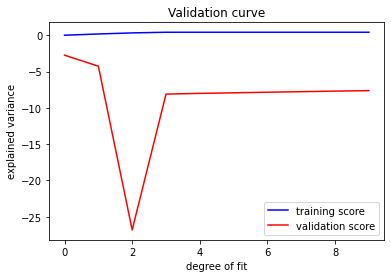

In [39]:
from sklearn.model_selection import validation_curve

degrees = np.arange(0,10)
X = df_general_trend["ACCIDENT_YEAR"].to_numpy()
y = df_general_trend["ACCIDENT_NO"].to_numpy()

train_score, val_score = validation_curve(PolynomialRegression(), X[:, None], y, param_name='polynomialfeatures__degree', param_range=degrees)
plt.plot(degrees, np.mean(train_score, 1), color='b', label='training score')
plt.plot(degrees, np.mean(val_score, 1), color='r', label='validation score')
plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.show()

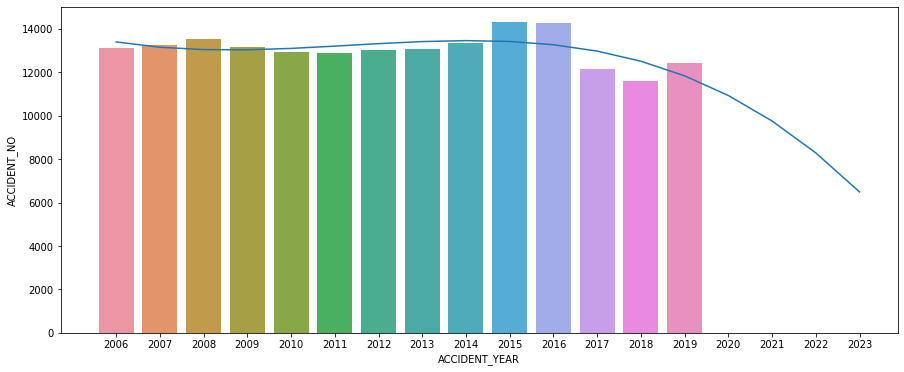

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_general_trend, x="ACCIDENT_YEAR", y="ACCIDENT_NO")
y_test = PolynomialRegression(3).fit(X.reshape(-1, 1), y).predict(X_test.reshape(-1, 1))
df_plot = pd.DataFrame({"YEARS": X_test, "ACCIDENT_NB": y_test})
df_plot["ACCIDENT_NB"].plot(kind='line')
ticks = plt.xticks()
plt.xticks(ticks = list(ticks[0]) + [14, 15, 16, 17], labels=X_test)
plt.show()
